In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
# install simpletransformers
!pip install simpletransformers

# check installed version
!pip freeze | grep simpletransformers
# simpletransformers==0.28.2

     |████████████████████████████████| 221 kB 7.2 MB/s 
     |████████████████████████████████| 3.3 MB 54.1 MB/s 
     |████████████████████████████████| 43 kB 2.8 MB/s 
     |████████████████████████████████| 1.6 MB 48.5 MB/s 
     |████████████████████████████████| 2.6 MB 56.0 MB/s 
     |████████████████████████████████| 124 kB 54.9 MB/s 
     |████████████████████████████████| 1.2 MB 31.3 MB/s 
     |████████████████████████████████| 264 kB 59.8 MB/s 
     |████████████████████████████████| 8.0 MB 27.4 MB/s 
     |████████████████████████████████| 895 kB 42.9 MB/s 
     |████████████████████████████████| 636 kB 51.0 MB/s 
     |████████████████████████████████| 133 kB 68.9 MB/s 
     |████████████████████████████████| 97 kB 8.1 MB/s 
     |████████████████████████████████| 170 kB 60.7 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 118 kB 68.9 MB/s 
     |████████████████████████████████| 243 kB 69.3 MB/s 
     |███████████████

simpletransformers==0.61.13


In [ ]:
!pip install tokenizers==0.10.1

     |████████████████████████████████| 3.2 MB 8.2 MB/s 
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.10.3
    Uninstalling tokenizers-0.10.3:
      Successfully uninstalled tokenizers-0.10.3


#**Load the dataset**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/balanced_all_data_wo_uncategorized.csv')
df

,Category,Unnamed: 0,Topic Title,Tags,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,distributed,0,About the distributed category,[],(Replace this first paragraph with a brief des...,"['Hi, smth, this is my (maybe almost) first co...","Dec 30, 2018 11:01 pm",0,701,1
1,distributed,1,Memory leak when using RPC for pipeline parall...,['distributed-rpc'],"Hi, when I use torch.distributed.rpc to implem...",['This looks interesting!\nI think firs you ne...,"Jul 20, 2021 5:39 am",0,75,11
2,distributed,2,Distributed Data Parallel example - “process 0...,[],I’m running Distributed Data Parallel example ...,[],0,0,0,0
3,distributed,3,How to use 8GPUs as 1,[],Hi I’m trying to do a learning a certain way a...,[],0,0,0,0
4,distributed,4,Disabling all reduce in Distributed Data Parallel,[],"Hello, I’m trying to setup distributed model t...",['\nIs it possible to disable this functionali...,"Jul 21, 2021 9:09 am",0,25,3
...,...,...,...,...,...,...,...,...,...,...
17742,vision,7876,Dependent Batches in DataSet,[],"Hi,\nI’m trying to figure out how should I imp...","['Hey, sorry for a late reply.\nI didn’t reall...","Feb 21, 2017 2:48 am",1,2.7k,3
17743,vision,7877,Converting a Variable to a Parameter,[],I’d like to build a CNN whose conv filters are...,['I think it would be much simpler with the fu...,"Feb 6, 2017 4:12 am",2,3.4k,8
17744,vision,7878,"VGG: Exploding RAM with simple code, bug?",[],"Hi all,\nPlease find attach a very simple code...","['Hi,\nYou are keeping track of the full histo...","Feb 23, 2017 6:22 am",0,776,4
17745,vision,7879,"For seq2seq, got any examples like CTC or atte...",[],get layer like CTC or attention?,['You could look at https://github.com/pytorch...,"Feb 22, 2017 5:34 am",0,2.1k,4


In [ ]:
df.shape

(17747, 10)

In [ ]:
df.Category.unique()

array(['distributed', 'autograd', 'C++', 'deployment', 'jit',
       'quantization', 'glow', 'nlp', 'Mobile', 'reinforcement-learning',
       'Memory Format', 'audio', 'mixed-precision', 'Site Feedback',
       'vision'], dtype=object)

In [ ]:
df.drop(columns= ['Unnamed: 0', 'Tags'], inplace=True)

In [ ]:
df

,Category,Topic Title,Leading Post,Post Replies,Created_at,Likes,Views,Replies
0,distributed,About the distributed category,(Replace this first paragraph with a brief des...,"['Hi, smth, this is my (maybe almost) first co...","Dec 30, 2018 11:01 pm",0,701,1
1,distributed,Memory leak when using RPC for pipeline parall...,"Hi, when I use torch.distributed.rpc to implem...",['This looks interesting!\nI think firs you ne...,"Jul 20, 2021 5:39 am",0,75,11
2,distributed,Distributed Data Parallel example - “process 0...,I’m running Distributed Data Parallel example ...,[],0,0,0,0
3,distributed,How to use 8GPUs as 1,Hi I’m trying to do a learning a certain way a...,[],0,0,0,0
4,distributed,Disabling all reduce in Distributed Data Parallel,"Hello, I’m trying to setup distributed model t...",['\nIs it possible to disable this functionali...,"Jul 21, 2021 9:09 am",0,25,3
...,...,...,...,...,...,...,...,...
17742,vision,Dependent Batches in DataSet,"Hi,\nI’m trying to figure out how should I imp...","['Hey, sorry for a late reply.\nI didn’t reall...","Feb 21, 2017 2:48 am",1,2.7k,3
17743,vision,Converting a Variable to a Parameter,I’d like to build a CNN whose conv filters are...,['I think it would be much simpler with the fu...,"Feb 6, 2017 4:12 am",2,3.4k,8
17744,vision,"VGG: Exploding RAM with simple code, bug?","Hi all,\nPlease find attach a very simple code...","['Hi,\nYou are keeping track of the full histo...","Feb 23, 2017 6:22 am",0,776,4
17745,vision,"For seq2seq, got any examples like CTC or atte...",get layer like CTC or attention?,['You could look at https://github.com/pytorch...,"Feb 22, 2017 5:34 am",0,2.1k,4


In [ ]:
df['post'] = df['Topic Title'] + ' ' + df['Leading Post'] + ' ' + df['Post Replies']

In [ ]:
import pandas as pd
import numpy as np
from numpy import random
import nltk
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
%matplotlib inline

Text(0, 0.5, 'Number of Posts')

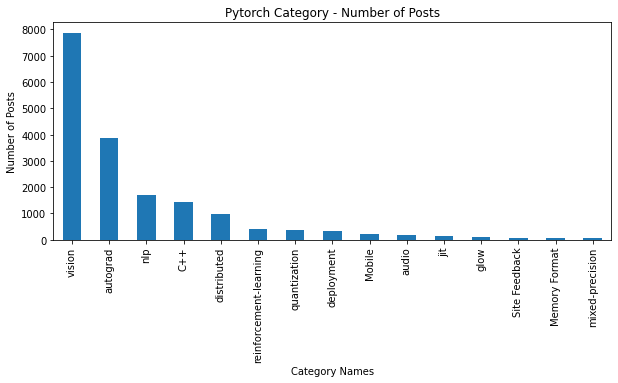

In [ ]:
plt.figure(figsize=(10,4))
df.Category.value_counts().plot(kind='bar')
plt.title('Pytorch Category - Number of Posts')
plt.xlabel('Category Names')
plt.ylabel('Number of Posts')

In [ ]:
df[df['Category'] == 'mixed-precision'].shape

(61, 9)

In [ ]:
df[df['Category'] == 'mixed-precision']

,Category,Topic Title,Leading Post,Post Replies,Created_at,Likes,Views,Replies,post
9735,mixed-precision,About the mixed-precision category,(Replace this first paragraph with a brief des...,[],0,0,0,0,About the mixed-precision category (Replace th...
9736,mixed-precision,Autocast with indexing incorrect types,I’m looking if there is a better or easier way...,[],0,0,0,0,Autocast with indexing incorrect types I’m loo...
9737,mixed-precision,SyncBatchNorm not working with autocast and mi...,I’m trying to use torch.nn.SyncBatchNorm.conve...,['I cannot reproduce the issue using:\nimport ...,"Jul 9, 2021 12:04 pm",0,32,3,SyncBatchNorm not working with autocast and mi...
9738,mixed-precision,Load pre-trained model w/o AMP and test with AMP,I have pre-trained model which is trained with...,"['Could you post the model definition, please,...","Jul 7, 2021 10:59 am",0,35,1,Load pre-trained model w/o AMP and test with A...
9739,mixed-precision,Implementation of Mixed Precision,"Hi, 'm new to mixed precision training.\nIn my...","['Yes, one GradScaler would work as described ...","Jul 7, 2021 4:56 am",0,37,1,"Implementation of Mixed Precision Hi, 'm new t..."
...,...,...,...,...,...,...,...,...,...
9791,mixed-precision,Do I need to save the state_dict oof GradScaler?,Do I need to save the state_dict of torch.cuda...,['If you want to restore the last scale factor...,"Sep 9, 2020 3:41 pm",1,294,1,Do I need to save the state_dict oof GradScale...
9792,mixed-precision,Inference in ONNX mixed precision model,"Hello,\nI trained frcnn model with automatic m...",['I’m not exactly sure how ONNX exports the mo...,"Aug 25, 2020 3:39 am",1,686,2,"Inference in ONNX mixed precision model Hello,..."
9793,mixed-precision,Issue with automatic mixed precision,Without AMP\nimport torch\nfrom torch.cuda.amp...,['Thanks for the code snippet. I cannot reprod...,"Aug 24, 2020 6:20 am",0,347,3,Issue with automatic mixed precision Without A...
9794,mixed-precision,Optimizer.step() – ok; scaler.step(optimizer):...,I am getting AssertionError: No inf checks wer...,['Scaler (optimizer) looks for parameters used...,"Aug 26, 2020 5:19 am",1,1.4k,1,Optimizer.step() – ok; scaler.step(optimizer):...


In [ ]:
df.fillna('', inplace=True)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, 'html.parser').text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df['post'] = df['post'].apply(clean_text)

In [ ]:
new_df = pd.DataFrame()
new_df['post'] = df['post']
new_df['category'] = df['Category']
new_df['post'] = new_df['post'].apply(lambda x: str(x))
new_df['category'] = new_df['category'].apply(lambda x: str(x))

In [ ]:
mylist = ['distributed', 'autograd', 'C++', 'deployment', 'jit',
       'quantization', 'glow', 'nlp', 'Mobile', 'reinforcement-learning',
       'Memory Format', 'audio', 'mixed-precision', 'Site Feedback',
       'vision']

len(mylist)

15

In [ ]:
new_df

,post,category
0,distributed category replace first paragraph b...,distributed
1,memory leak using rpc pipeline parallelism hi ...,distributed
2,distributed data parallel example process 0 te...,distributed
3,use 8gpus 1 hi im trying learning certain way ...,distributed
4,disabling reduce distributed data parallel hel...,distributed
...,...,...
17742,dependent batches dataset hi im trying figure ...,vision
17743,converting variable parameter id like build cn...,vision
17744,vgg exploding ram simple code bug hi please fi...,vision
17745,seq2seq got examples like ctc attention get la...,vision


In [ ]:
# changing class names (text) to numbers (a necessity for simpletransformers library)
new_df['category'] = new_df.apply(lambda x:  mylist.index(x['category']),axis=1)

In [ ]:
new_df

,post,category
0,distributed category replace first paragraph b...,0
1,memory leak using rpc pipeline parallelism hi ...,0
2,distributed data parallel example process 0 te...,0
3,use 8gpus 1 hi im trying learning certain way ...,0
4,disabling reduce distributed data parallel hel...,0
...,...,...
17742,dependent batches dataset hi im trying figure ...,14
17743,converting variable parameter id like build cn...,14
17744,vgg exploding ram simple code bug hi please fi...,14
17745,seq2seq got examples like ctc attention get la...,14


In [ ]:
new_df['category'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(new_df, test_size=0.10)

print('train shape: ',train_df.shape)
print('test shape: ',test_df.shape)

train shape:  (15972, 2)
test shape:  (1775, 2)


#Load pre-trained model
#Bert ======================================

In [ ]:
!pip install simpletransformers
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "bert-base-cased",
    num_labels=15,
    args=train_args
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [ ]:
# Train the model
model.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15972 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

(7988, 0.6451885711695392)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1775 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/222 [00:00<?, ?it/s]

In [ ]:
result

{'acc': 0.8107042253521127,
 'eval_loss': 0.8526314658874243,
 'f1': 0.8107042253521127,
 'mcc': 0.7363947175231497}

In [ ]:
#save and load the model
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorch-bert-categclass')

In [ ]:
!tar -zxvf ./pytorch-bert-categclass.tar.gz

outputs/tokenizer_config.json
outputs/config.json
outputs/tokenizer.json
outputs/training_args.bin
outputs/eval_results.txt
outputs/vocab.txt
outputs/special_tokens_map.json
outputs/model_args.json
outputs/pytorch_model.bin


In [ ]:
!rm -rf outputs

In [ ]:
#/content/pytorch-bert-categclass.tar.gz
#/content/gdrive/MyDrive
!mv "/content/pytorch-bert-categclass.tar.gz" "/content/gdrive/MyDrive/"

In [ ]:
#Test the loaded model on a real example

import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('/content/gdrive/MyDrive/pytorch-bert-categclass')

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model = ClassificationModel(
    "bert", "outputs/",
    num_labels=15,
    args=train_args
)

In [ ]:
mylist = ['distributed', 'autograd', 'C++', 'deployment', 'jit',
       'quantization', 'glow', 'nlp', 'Mobile', 'reinforcement-learning',
       'Memory Format', 'audio', 'mixed-precision', 'Site Feedback',
       'vision']

In [ ]:
post1_title = input('Your forum post title: ')

Your forum post title: How to increase loss


In [ ]:
post1_body = input('Your forum post body: ')

Your forum post body: Hello  I am trying to reconstruct Sinogram.  However, the loss decreases so quickly that the psnr converges at 31 and no longer increases.  So I want to improve psnr by slowing down the loss.  How can I increase loss and is my method correct?


In [ ]:
post1 = post1_title + ' ' + post1_body
predictions, raw_outputs = model.predict([post1])

print(mylist[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

vision


In [ ]:
post2_title = input('Your forum post title: ')
post2_body = input('Your forum post body: ')

Your forum post title: GRU creation resulted in error
Your forum post body: Hi,  I try to create a GRU in pytorch as follows.  self.gru = nn.GRU(input_size=(4,128), hidden_size=128, num_layers=no_of_layers, batch_first=True) Got the following error.  TypeError: new(): argument 'size' must be tuple of ints, but found element of type tuple at pos 2 Any idea what could be the mistake?  Thanks Regards Pranavan


In [ ]:
post2 = post2_title + ' ' + post2_body
predictions, raw_outputs = model.predict([post2])

print(mylist[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

nlp


In [ ]:
#uncategorized
post3_title = input('Your forum post title: ')
post3_body = input('Your forum post body: ')

Your forum post title: Can I group batches by length?
Your forum post body: Hi everyone.  I am working on an ASR project, where I use a model from HuggingFace (wav2vec2). My goal for now is to move the training process to PyTorch, so I am trying to create everything that HuggingFace’s Trainer() class gives.  One of these utilities is the ability to group batches by length and combine this with dynamic padding (via a data collator). To be honest however, I am not sure how to even begin this. Would I need to create a custom Dataloader class and alter it, so that every time it gives me batch sizes of lengths as close as possible?  The input are 1-D arrays that represent the raw waveform of a .wav file. An idea I had, was to somehow sort the data from shortest to longest (or the opposite), and each time extract batch_size samples from them. This way, the first batch will consist of samples with the biggest lengths, the second batch will have the second biggest lengths, etc.  Nevertheless, 

In [ ]:
post3 = post3_title + ' ' + post3_body
predictions, raw_outputs = model.predict([post3])

print(mylist[predictions[0]])

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

nlp


#XLNET====================================

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}


# Create a ClassificationModel
model_xlnet = ClassificationModel(
    'xlnet', 'xlnet-base-cased',
    num_labels=15,
    args=train_args
)

Downloading:   0%|          | 0.00/760 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/467M [00:00<?, ?B/s]

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetForSequenceClassification: ['lm_loss.weight', 'lm_loss.bias']
- This IS expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLNetForSequenceClassification were not initialized from the model checkpoint at xlnet-base-cased and are newly initialized: ['sequence_summary.summary.bias', 'logits_proj.bias', 'sequence_summary.summary.weight', 'logits_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

In [ ]:
# Train the model
model_xlnet.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15972 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

(7988, 0.6803375818770384)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_xlnet, model_outputs, wrong_predictions = model_xlnet.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1775 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/222 [00:00<?, ?it/s]

In [ ]:
result_xlnet

{'acc': 0.8090140845070423,
 'eval_loss': 0.895035096186188,
 'f1': 0.8090140845070424,
 'mcc': 0.738208267339319}

In [ ]:
#save and load the model
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorch-xlnet-categclass')

In [ ]:
!tar -zxvf ./pytorch-xlnet-categclass.tar.gz

outputs/tokenizer_config.json
outputs/config.json
outputs/tokenizer.json
outputs/training_args.bin
outputs/eval_results.txt
outputs/vocab.txt
outputs/special_tokens_map.json
outputs/spiece.model
outputs/model_args.json
outputs/pytorch_model.bin


In [ ]:
!rm -rf outputs

In [ ]:
!mv "/content/pytorch-xlnet-categclass.tar.gz" "/content/gdrive/MyDrive/"

In [ ]:
#Test the loaded model on a real example

import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('/content/gdrive/MyDrive/pytorch-xlnet-categclass')

In [ ]:
mylist = ['distributed', 'autograd', 'C++', 'deployment', 'jit',
       'quantization', 'glow', 'nlp', 'Mobile', 'reinforcement-learning',
       'Memory Format', 'audio', 'mixed-precision', 'Site Feedback',
       'vision']

In [ ]:
post4_title = input('Your forum post title: ')
post4_body = input('Your forum post body: ')

post4 = post4_title + ' ' + post4_body
predictions, raw_outputs = model.predict([post4])

print(mylist[predictions[0]])

Your forum post title: How to write jit model to a file in text format including backward?
Your forum post body: Hi, I’m looking for a way to write the graph (preferably torch.jit.script module) forward and backward into a text format file. A simple way to write the forward: module = torch.jit.script(model) # JIT for model print(module.code) But, is there something similar to write the backward? The reason I’m looking for that is: I want to evaluate performance of the forward and backward for a theoretical HW. I tried to use pytorch profile, but it does not give all the information. Does not give the graph connectivity and tensor sizes ONNX export support only forward.  Any other idea?


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

jit


In [ ]:
#uncategorized
post5_title = input('Your forum post title: ')
post5_body = input('Your forum post body: ')

post5 = post5_title + ' ' + post5_body
predictions, raw_outputs = model.predict([post5])

print(mylist[predictions[0]])

Your forum post title: How to use TensorboardX ptorch
Your forum post body: Hello,  I am new to pytorch. I have build a siamese network with a custom hand gesture video dataset with accuracy as an evaluation metric.  Now I have to plot the accuracy and loss function graphs. I would like to use tensorboardX for the same. I have referred the pytorch official website for the same, but did not understand how to use it in my case having a custom dataset and not MNIST dataset.  But, I am not aware about the structure and summary writer.  Can anyone please help me with this?  Any help is most appreciated ! Thank you in advance


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

vision


#Roberta========================================

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model_rob = ClassificationModel(
    'roberta', 'roberta-base',
    num_labels=15,
    args=train_args
)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.bias', 'classifier.out_proj.bias', 'classifier.de

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# Train the model
model_rob.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15972 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

(7988, 0.7292312603497726)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_Roberta, model_outputs, wrong_predictions = model_rob.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1775 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/222 [00:00<?, ?it/s]

In [ ]:
result_Roberta

{'acc': 0.8078873239436619,
 'eval_loss': 0.7580682444721796,
 'f1': 0.8078873239436619,
 'mcc': 0.7345375539246086}

In [ ]:
#save and load the model
import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorch-roberta-categclass')

In [ ]:
!tar -zxvf ./pytorch-roberta-categclass.tar.gz

outputs/tokenizer_config.json
outputs/config.json
outputs/merges.txt
outputs/tokenizer.json
outputs/training_args.bin
outputs/eval_results.txt
outputs/vocab.txt
outputs/special_tokens_map.json
outputs/spiece.model
outputs/vocab.json
outputs/model_args.json
outputs/pytorch_model.bin


In [ ]:
!rm -rf outputs

In [ ]:
!mv "/content/pytorch-roberta-categclass.tar.gz" "/content/gdrive/MyDrive/"

In [ ]:
#Test the loaded model on a real example
import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('/content/gdrive/MyDrive/pytorch-roberta-categclass')

In [ ]:
post6_title = input('Your forum post title: ')
post6_body = input('Your forum post body: ')

post6 = post6_title + ' ' + post6_body
predictions, raw_outputs = model.predict([post6])

print(mylist[predictions[0]])

Your forum post title: TorchServe AWS EC2 Deployment Error
Your forum post body: Hello, I’m getting the following error message: start java frontend failed: (<class ‘NotADirectoryError’>, NotADirectoryError(20, ‘Not a directory’), <traceback object at 0x7f972aa7ad20>), while trying to start the torchserve serve on AWS EC2, using the following command:  torchserve --start --model-store model_store --models densenet161=densenet161.mar  What am I doing wrong? Thanks


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

deployment


In [ ]:
#uncategorized
post7_title = input('Your forum post title: ')
post7_body = input('Your forum post body: ')

post7 = post7_title + ' ' + post7_body
predictions, raw_outputs = model.predict([post7])

print(mylist[predictions[0]])

Your forum post title: Can I group batches by length?
Your forum post body: Hi everyone.  I am working on an ASR project, where I use a model from HuggingFace (wav2vec2). My goal for now is to move the training process to PyTorch, so I am trying to create everything that HuggingFace’s Trainer() class gives.  One of these utilities is the ability to group batches by length and combine this with dynamic padding (via a data collator). To be honest however, I am not sure how to even begin this. Would I need to create a custom Dataloader class and alter it, so that every time it gives me batch sizes of lengths as close as possible?  The input are 1-D arrays that represent the raw waveform of a .wav file. An idea I had, was to somehow sort the data from shortest to longest (or the opposite), and each time extract batch_size samples from them. This way, the first batch will consist of samples with the biggest lengths, the second batch will have the second biggest lengths, etc.  Nevertheless, 

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

nlp


#DistilBert==============================

In [ ]:
from simpletransformers.classification import ClassificationModel

# define hyperparameter
train_args ={"reprocess_input_data": True,
             "overwrite_output_dir": True,
             "fp16":False,
             "num_train_epochs": 4}

# Create a ClassificationModel
model_distil = ClassificationModel(
    'distilbert', 'distilbert-base-cased',
    num_labels=15,
    args=train_args
)

Downloading:   0%|          | 0.00/411 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/263M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-cased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'pre_classifier.weight', 'classifier.b

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

In [ ]:
# Train the model
model_distil.train_model(train_df)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:616: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/15972 [00:00<?, ?it/s]

Epoch:   0%|          | 0/4 [00:00<?, ?it/s]

Running Epoch 0 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 1 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 2 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

Running Epoch 3 of 4:   0%|          | 0/1997 [00:00<?, ?it/s]

(7988, 0.6156840465708604)

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def f1_multiclass(labels, preds):
    return f1_score(labels, preds, average='micro')
    
result_distilbert, model_outputs, wrong_predictions = model_distil.eval_model(test_df, f1=f1_multiclass, acc=accuracy_score)

/usr/local/lib/python3.7/dist-packages/simpletransformers/classification/classification_model.py:1402: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


  0%|          | 0/1775 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/222 [00:00<?, ?it/s]

In [ ]:
result_distilbert

{'acc': 0.7988732394366197,
 'eval_loss': 0.8720293041058556,
 'f1': 0.7988732394366197,
 'mcc': 0.7229188869759153}

In [ ]:
#save and load the model

import os
import tarfile

def save_model(model_path='',file_name=''):
  files = [files for root, dirs, files in os.walk(model_path)][0]
  with tarfile.open(file_name+ '.tar.gz', 'w:gz') as f:
    for file in files:
      f.add(f'{model_path}/{file}')

In [ ]:
save_model('outputs','pytorch-distilbert-categclass')

In [ ]:
!tar -zxvf ./pytorch-distilbert-categclass.tar.gz

outputs/tokenizer_config.json
outputs/config.json
outputs/merges.txt
outputs/tokenizer.json
outputs/training_args.bin
outputs/eval_results.txt
outputs/vocab.txt
outputs/special_tokens_map.json
outputs/spiece.model
outputs/vocab.json
outputs/model_args.json
outputs/pytorch_model.bin


In [ ]:
!rm -rf outputs

In [ ]:
!mv "/content/pytorch-distilbert-categclass.tar.gz" "/content/gdrive/MyDrive/"

In [ ]:
#Test the loaded model on a real example

import os
import tarfile

def unpack_model(model_name=''): 
  tar = tarfile.open(f"{model_name}.tar.gz", "r:gz")
  tar.extractall()
  tar.close()

unpack_model('/content/gdrive/MyDrive/pytorch-distilbert-categclass')

In [ ]:
post8_title = input('Your forum post title: ')
post8_body = input('Your forum post body: ')

post8 = post8_title + ' ' + post8_body
predictions, raw_outputs = model.predict([post8])

print(mylist[predictions[0]])

Your forum post title: Vulkan concatenation operator
Your forum post body: Hi,  Based on the tutorial: PyTorch Vulkan Backend User Workflow — PyTorch Tutorials 1.8.1+cu102 documentation  The operator _cat is supposed to be supported in the vulkan backend. Yet when I try run an exported model using it on android, I get the following error:  RuntimeError: Could not run 'aten::_cat' with arguments from the 'Vulkan' backend. This could be because the operator doesn't exist for this backend, or was omitted during the selective/custom build process (if using custom build). If you are a Facebook employee using PyTorch on mobile, please visit https://fburl.com/ptmfixes for possible resolutions. 'aten::_cat' is only available for these backends: [CPU, QuantizedCPU, BackendSelect, Named, AutogradOther, AutogradCPU, AutogradCUDA, AutogradXLA, Tracer, Autocast, Batched, VmapMode].  Is there any reason this is happening?  Thanks,  Julien


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Mobile


In [ ]:
#uncategorized
post9_title = input('Your forum post title: ')
post9_body = input('Your forum post body: ')

post9 = post9_title + ' ' + post9_body
predictions, raw_outputs = model.predict([post9])

print(mylist[predictions[0]])

Your forum post title: How to find input corresponding to argmin of output?
Your forum post body: I have a basic scenario like this,  import torch  def someFn(w):          return w.sum(dim=1)  w = torch.rand(10,3,2) fW = someFn(w)  fMinW, fIndex = fW.min(dim=1)  # Select wmin of size 10,3 Now I want to select the 10 (1x3) vectors that correspond to the fMinW output. How can I achieve this ?


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

autograd


#Results===================================

In [ ]:
import pandas as pd
result=pd.DataFrame({'Model_Name': ['BERT', 'roberta', 'distilbert','xlnet'],
                     'Accuracy':[result['acc'],result_Roberta['acc'],result_distilbert['acc'],result_xlnet['acc']],
                     'Evaluation_loss':[result['eval_loss'],result_Roberta['eval_loss'],result_distilbert['eval_loss'],result_xlnet['eval_loss']],
                      'F1_Score':[result['f1'],result_Roberta['f1'],result_distilbert['f1'],result_xlnet['f1']],
                      'MCC':[result['mcc'],result_Roberta['mcc'],result_distilbert['mcc'],result_xlnet['mcc']]})

In [ ]:
result

,Model_Name,Accuracy,Evaluation_loss,F1_Score,MCC
0,BERT,0.810704,0.852631,0.810704,0.736395
1,roberta,0.807887,0.758068,0.807887,0.734538
2,distilbert,0.798873,0.872029,0.798873,0.722919
3,xlnet,0.809014,0.895035,0.809014,0.738208
